In [1]:
from numpy import *

In [2]:
x1 = array([1, 1, -1]).T
W1 = array([
    [0, 1, 1],
    [-2,2, -1]
])
W2 = array([
    [0, 2],
    [1, 1]
])
b1 = array([1, 2]).T
b2 = array([1, 1]).T
# x2 = sigmoid(w1 * x1 + b1)
def sigmoid(x):
    return 1 / (1 + exp(-x))

x2 = sigmoid(W1@x1 + b1)
x3 = (W2@x2) + b2

In [3]:
x2

array([0.73105858, 0.95257413])

In [4]:
x3

array([2.90514825, 2.68363271])

In [5]:
t = array([1, 2]).T

In [6]:
t-x3

array([-1.90514825, -0.68363271])

In [7]:
dl = array([1, 1]).T

In [8]:
x2 * (1-x2)

array([0.19661193, 0.04517666])

In [9]:
(W2@(x2 * (1-x2))).shape

(2,)

In [10]:
x1.shape

(3,)

In [11]:
# add dimension
W2@(x2 * (1-x2)).reshape(2,1)@x1.reshape(1,3)

array([[ 0.09035332,  0.09035332, -0.09035332],
       [ 0.24178859,  0.24178859, -0.24178859]])

In [12]:
x1.reshape(1,3)

array([[ 1,  1, -1]])

In [13]:
import torch
from torch import tensor

In [14]:
x1 = tensor(x1, dtype=torch.float32, requires_grad=True)
W1 = tensor(W1, dtype=torch.float32, requires_grad=True)
W2 = tensor(W2, dtype=torch.float32, requires_grad=True)
b1 = tensor(b1, dtype=torch.float32, requires_grad=True)
b2 = tensor(b2, dtype=torch.float32, requires_grad=True)
t = tensor(t, dtype=torch.float32, requires_grad=True)

In [15]:
x2 = torch.sigmoid(W1@x1+ b1)

In [16]:
x3 = (W2@x2) + b2

In [17]:
L = torch.abs(x3-t)

In [18]:
# L.backward(x3)
torch.autograd.grad(L, W1, grad_outputs=torch.ones_like(L), retain_graph=True)

(tensor([[ 0.1966,  0.1966, -0.1966],
         [ 0.1355,  0.1355, -0.1355]]),)

In [20]:
torch.autograd.grad(L, W2, grad_outputs=torch.ones_like(L), retain_graph=True)

(tensor([[0.7311, 0.9526],
         [0.7311, 0.9526]]),)

In [21]:
torch.autograd.grad(L, b1, grad_outputs=torch.ones_like(L), retain_graph=True)

(tensor([0.1966, 0.1355]),)

In [22]:
torch.autograd.grad(L, b2, grad_outputs=torch.ones_like(L), retain_graph=True)

(tensor([1., 1.]),)

In [23]:
x2

tensor([0.7311, 0.9526], grad_fn=<SigmoidBackward0>)

In [24]:
x1

tensor([ 1.,  1., -1.], requires_grad=True)

In [33]:
mat = torch.tensor([
    [0, 0, -1, 0, 0, 0, 1, 0, 0],
    [0, -1, -1, -1, 0, 1, 1, 1, 0],
    [-1, -1, -1, -1, 0, 1, 1, 1, 1],
    [0, -1, -1, -1, 0, 1, 1, 1, 0],
    [0, 0, -1, 0, 0, 0, 1, 0, 0]
], dtype=torch.float32)

# Define the 3x3 kernel
kernel = torch.tensor([
    [0, -0.5, 0],
    [-0.5, 1, -0.5],
    [0, -0.5, 0]
], dtype=torch.float32)

m = torch.nn.functional.conv2d(mat.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), padding=1, stride=1)
m.cpu().numpy()

array([[[[ 0. ,  1. , -0.5,  1. ,  0. , -1. ,  0.5, -1. ,  0. ],
         [ 1. ,  0. ,  1. ,  0. ,  0. ,  0. , -1. ,  0. , -1. ],
         [-0.5,  1. ,  1. ,  0.5,  0. , -0.5, -1. , -1. ,  0.5],
         [ 1. ,  0. ,  1. ,  0. ,  0. ,  0. , -1. ,  0. , -1. ],
         [ 0. ,  1. , -0.5,  1. ,  0. , -1. ,  0.5, -1. ,  0. ]]]],
      dtype=float32)

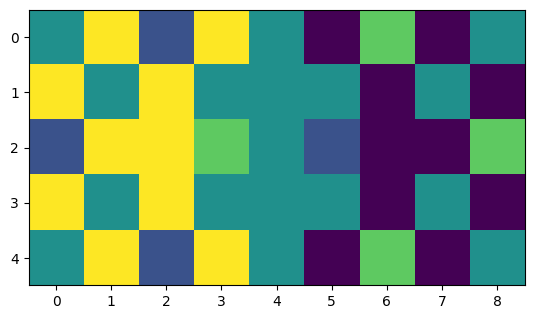

In [47]:
plt.imshow(m[0,0])
plt.show()

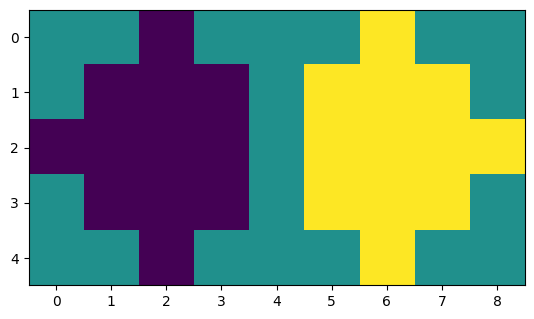

In [48]:
plt.imshow(mat)
plt.show()

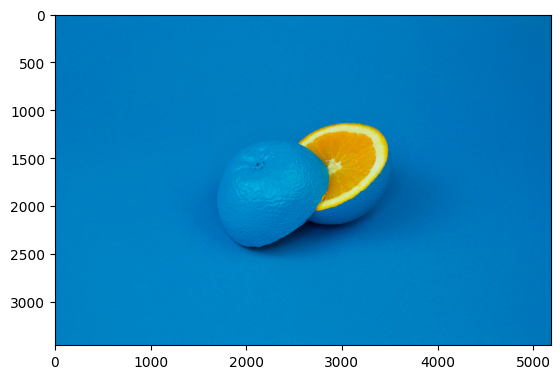

In [35]:
# pillow for opening images
from PIL import Image

image = Image.open("davisuko-5E5N49RWtbA-unsplash.jpg")
image = image.convert("RGB")

from matplotlib import pyplot as plt

plt.imshow(image)
plt.show()

In [62]:
# convert to torch tensor
image_tensor = torch.from_numpy(array(image)).permute(2, 0, 1)
# grayscale, average RGB
image_tensor = image_tensor.mean(0, keepdim=True, dtype=torch.float)

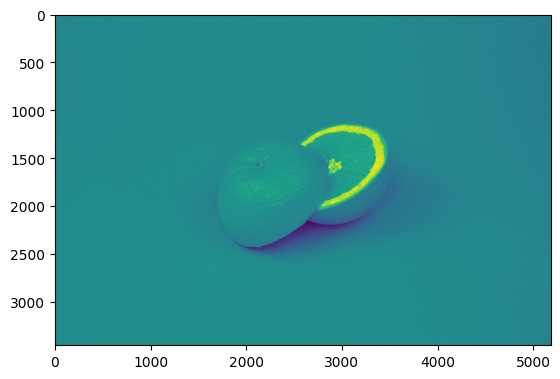

In [63]:
plt.imshow(image_tensor[0])
plt.show()

In [64]:
kernel.shape, image_tensor.shape

(torch.Size([3, 3]), torch.Size([1, 3456, 5184]))

In [66]:
new_image = torch.nn.functional.conv2d(image_tensor.unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), padding=1, stride=1)

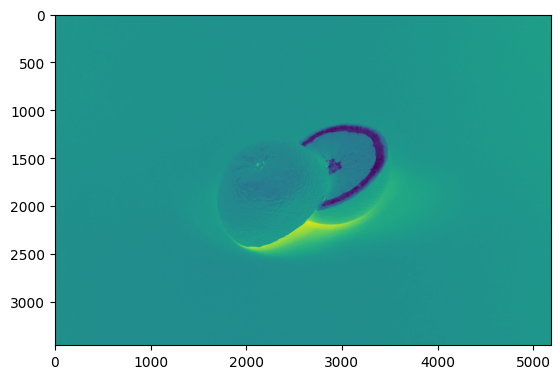

In [67]:
plt.imshow(new_image[0,0])
plt.show()